# __Heart Disease Prediction – Part 1__

## __Clustering__

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
%store -r df_shuffle
df = df_shuffle
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
2,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
3,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
4,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0


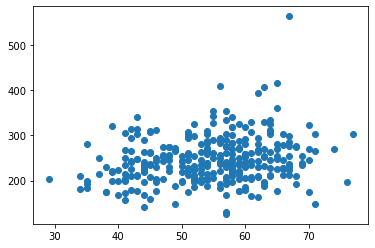

In [3]:
X = df[['age', 'chol']].to_numpy()
plt.scatter(X[:,0], X[:,1])

## __Elbow Method__

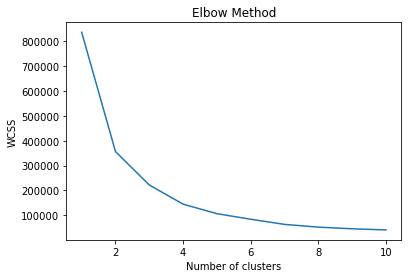

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The inertia in the Elbow method stars decreading in a linear fashion at "number of clusters (K)" = 3, but seems like 4 as well

In [48]:
K = 3

## __Fit and Predict__

In [57]:
def fit_pred(n):
    global X
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    print(kmeans.cluster_centers_)
    return kmeans


In [58]:
kmeans = []
for i in range (5):
    if (i > K-1):
        print("Cluster Centers of K =", i)
        kmeans.append(fit_pred(i))
        print("")

Cluster Centers of K = 3
[[ 55.49264706 254.99264706]
 [ 52.02631579 198.47368421]
 [ 56.50943396 326.66037736]]

Cluster Centers of K = 4
[[ 56.33333333 305.44927536]
 [ 55.01538462 246.80769231]
 [ 62.6        438.2       ]
 [ 51.72727273 194.60606061]]



## __Decision Boundaries__

In [80]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=8, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [108]:
def plot_decision_boundaries_figs(kmeans_array):
    global X, k
    n_kmeans = len(kmeans_array)
    for i in range(n_kmeans):
        print('Decision Bounds for K =', K+i)
        plot_decision_boundaries(kmeans_array[i], X)
        plt.show()
    

Decision Bounds for K = 3


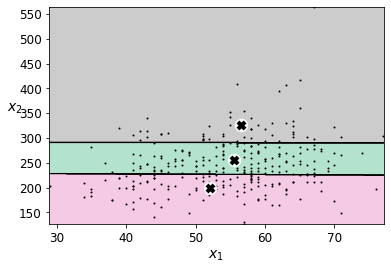

Decision Bounds for K = 4


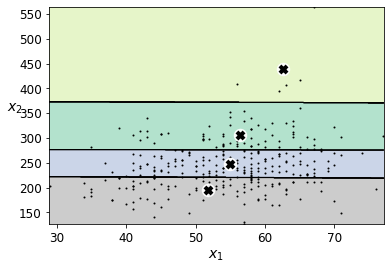

In [109]:
plot_decision_boundaries_figs(kmeans)

When K = 4, it seemed that the 4th boundary have very little scatter. Hence, K = 3 is used. 

## __K-Means Algorithm__

In [125]:
def kmeans_algo(X, n):
    kmeans_iter = []
    for i in range(n):
        kmeans_iter.append(KMeans(n_clusters=K, init="random", n_init=1,
        algorithm = "full", max_iter = i+1, random_state = 1))
        kmeans_iter[i].fit(X)

    for i in range(n):
        plt.figure(figsize=(12, 4))
        if (i == 0):
            plt.subplot(121)
            plot_data(X)
            plot_centroids(kmeans_iter[i].cluster_centers_, circle_color='r', cross_color='w')
            plt.ylabel("$x_2$", fontsize=14, rotation=0)
            plt.tick_params(labelbottom=False)
            plt.title("Update the centroids (initially randomly)", fontsize=14)

            plt.subplot(122)
            plot_decision_boundaries(kmeans_iter[i], X, show_xlabels=False, show_ylabels=False)
            plt.title("Label the instances", fontsize=14)
        else:
            plt.subplot(121)
            plot_decision_boundaries(kmeans_iter[i-1], X, show_centroids=False, show_xlabels=False)
            plot_centroids(kmeans_iter[i].cluster_centers_)

            plt.subplot(122)
            plot_decision_boundaries(kmeans_iter[i], X, show_xlabels=False, show_ylabels=False)
                
    plt.show()
    

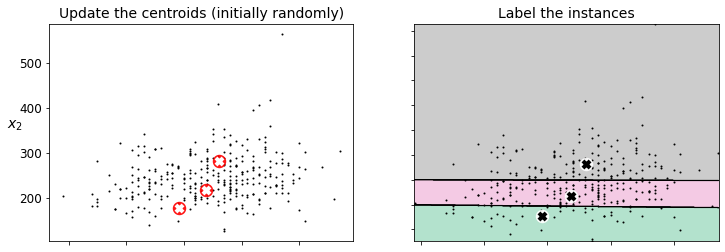

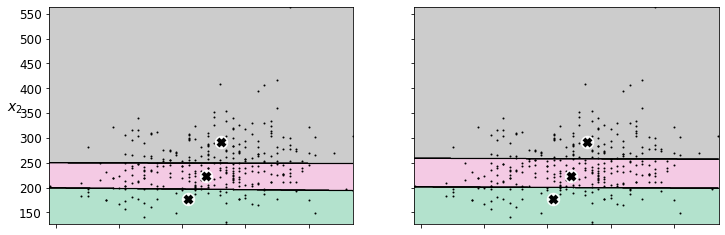

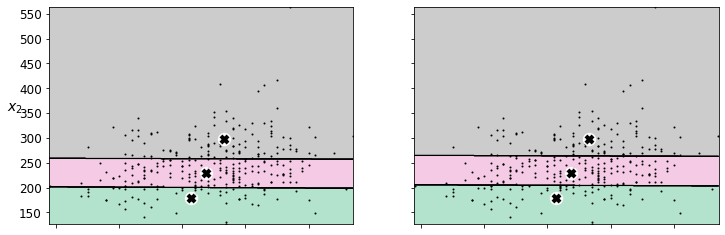

In [126]:
kmeans_algo(X, 3)